In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from fastai.tabular import *

sns.set(style="whitegrid")

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [64]:
df = pd.read_csv('data/data02.csv', low_memory=False, index_col=0)

In [65]:
# Y = df.pe.copy()
# X = df.drop('pe',1)

In [66]:
# train_size = int(len(X) * 0.8)
# X_train, X_test = X[0:train_size], X[train_size:len(X)]
# y_train, y_test = Y[0:train_size], Y[train_size:len(X)]

In [67]:
train_size = int(len(df) * 0.8)
df_train, df_test = df[0:train_size].copy(), df[train_size:len(df)].copy()

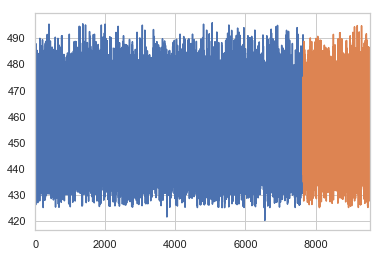

In [68]:
df_train.pe.plot()
df_test.pe.plot()

In [69]:
y_test = df_test.pe.copy()

In [70]:
df_test.drop('pe',axis=1,inplace=True)

In [50]:
path='data'
dep_var = 'pe'
cont_names = df_test.columns
procs = [Normalize]
valid_idx = range(len(df_train)-1000, len(df_train))

In [26]:
# test = TabularList.from_df(df_test, cont_names=cont_names, procs=procs)
# data = (TabularList.from_df(df_train, path='.', cont_names=cont_names, procs=procs)
#                                     .split_by_idx(valid_idx=range(len(df_train)-1000,len(df_train)))
#                                     .label_from_df(cols=dep_var)
#                                     .add_test(test, label=0)
#                                     .databunch())

In [51]:
data = TabularDataBunch.from_df(path, df_train, dep_var, valid_idx=valid_idx, procs=procs, cont_names=cont_names)

In [52]:
data.show_batch(rows=10)

at,v,ap,rh,target
-1.6589,-1.0710,1.5781,0.9873,484.29
1.4427,1.8009,-1.8075,-0.9427,438.43
-1.8935,-1.1731,1.9382,0.3622,482.11
0.4745,1.1524,-0.5943,1.0816,448.6
0.2870,0.6837,-0.2712,0.9429,443.1
-0.6421,-1.1276,0.7586,-0.5321,456.41
1.0718,0.9978,-1.2673,-0.8743,439.03
1.7784,0.9483,-0.5455,-0.8655,431.54
1.4885,1.3668,-1.1681,-1.3553,434.89
-0.4722,-1.2273,-1.8580,0.1238,467.89


In [142]:
learn = tabular_learner(data, layers=[200,100], metrics=mse)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


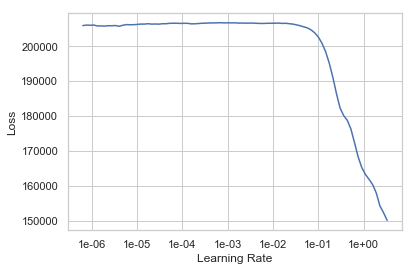

In [120]:
learn.lr_find()
learn.recorder.plot()

In [143]:
learn.fit_one_cycle(10, 0.01)

epoch,train_loss,valid_loss,mean_squared_error,time
0,205396.125000,204115.484375,204115.484375,01:22
1,168570.500000,121403.250000,121403.250000,01:22
2,44737.980469,2061.586914,2061.586914,01:21
3,5684.653320,19.295523,19.295525,01:20
4,733.639771,19.282078,19.282078,01:20
5,112.710930,18.324476,18.324478,01:20
6,34.637680,17.167755,17.167755,01:22
7,23.278425,17.704012,17.704016,01:20
8,22.479193,17.252800,17.252800,01:22
9,21.502867,16.270477,16.270479,01:23


In [144]:
preds=np.zeros_like(y_test)
for i in range(len(y_test)):
    preds[i]=learn.predict(df_test.iloc[i])[1].item()

In [145]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,preds),mean_squared_error(y_test,preds)

(0.9470442799055088, 15.936577406101723)

In [158]:
learn.export()